<a href="https://colab.research.google.com/github/Shivam10816/CS22M082_ASSIGNEMNT_1/blob/q2/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import time

**Question** **1**


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.datasets import fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


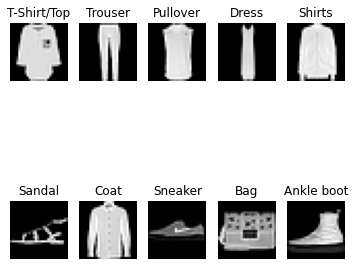

In [ ]:
titles = ["T-Sself.hirt/Top","Trouser","Pullover","Dress","Sself.hirts","Sandal","Coat","Sneaker","Bag","Ankle boot"]
IMG = plt.figure(figsize=(6,6))
for i in range(0,10):
  index =random.choice(np.where(training_labels==i)[0])
  IMG.add_subplot(2, 5, i+1)
  plt.imshow(training_images[index],cmap="gray")
  plt.title(titles[i])
  plt.axis("off")



In [ ]:
import time

QUESTION **2**

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.datasets import fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()


hi = [10,10]
class FeedForwardNeuralNetwork :
   
    hi=[]     #self.hidden layers specifications
    A=[]      #list of pre activation
    H=[]      #list of activation
    W=[]      #list of weights
    b=[]      # list of bias
    train_data=[] 
    train_lable=[]
    l=0
    def __init__(self,X_data ,X_lable,hi):
      self.train_data = X_data
      self.train_lable = X_lable
      self.hi =hi
      self.l= len(self.train_data[0])*len(self.train_data[0])

      self.W =[np.random.randn(self.hi[0],self.l)] 
      self.b =[np.random.randn(1,self.hi[0])]
      self.A =[np.zeros((1,self.hi[0]))]
      self.H = [np.zeros((1,self.hi[0]))]
      for i in range(1,len(self.hi)) :
        self.W.append(np.random.randn(self.hi[i],self.hi[i-1]))
        self.b.append(np.random.randn(1,self.hi[i]))
        self.A.append(np.zeros((1,self.hi[i])))
        self.H.append(np.zeros((1,self.hi[i])))
      self.W.append(np.random.randn(10,self.hi[-1]))
      self.A.append(np.zeros((1,10)))
      self.b.append(np.random.randn(1,10))

      # for i in self.W :
      #   print(i.shape)
      # for i in self.b :
      #   print(i.shape)
      # for i in self.A :
      #   print(i.shape)
      # for i in self.H :
      #   print(i.shape)
      
    #--------------------correct initialization----------------------
    
    def softmax(self,z):
      s = np.max(z)
      e_x = np.exp(z - s)
      div = np.sum(e_x)
      return e_x / div
    
   
    def sigmoid(self,H,A):
      for i in range(0,len(A)):
          if A[i]<0 :
            H[i]= np.exp(A[i])/(1+np.exp(A[i]))
          else:
            H[i]=  1/(1+np.exp(-A[i]))
      return H

      #--------------------------------forward propogation----------------------

    def forward_pro(self,image):

      x = np.reshape(image,(1,self.l)); # 1 x 784
      

      for i in range(0,self.hi[0]):
  
        
        self.A[0][0][i]=(np.dot(self.W[0][i],x[0])+self.b[0][0][i]) # a0 = WoX +bo

      
      for i in range(1,len(self.hi)):
  
        self.H[i-1][0]=self.sigmoid(self.H[i-1][0],self.A[i-1][0]) # hi = g(ai)

        for j in range(0,self.hi[i]):
          self.A[i][0][j]=(np.dot(self.W[i][j],self.H[i-1][0])+self.b[i][0][j])  # ai = WiX +bi


      self.H[-1][0]=self.sigmoid(self.H[-1][0],self.A[-2][0])

      for j in range(0,10):
          self.A[-1][0][j]=(np.dot(self.W[-1][j],self.H[-1][0])+self.b[-1][0][j])
      
      self.y_hat = self.softmax((self.A[-1][0]))
      # print("---data in W------")
      # for i in self.W :
      #   print(i)
      # print("---data in b------")
      # for i in self.b :
      #   print(i)
      # print("---data in A------")
      # for i in self.A :
      #   print(i)
      # print("---data in H------")
      # for i in self.H :
      #   print(i)

    def back_prop(self,image,lable):
        W_theta , b_theta,H_theta,A_theta =self.W,self.b,self.H,self.A
        
        ey = np.zeros((1,len(self.y_hat)))

        ey[0][lable]=1;
       
        L =len(A_theta)


        A_theta[L-1]=(-(ey-self.y_hat))
        
        /#-------------------------
        for k in range(L-1,0,-1):
          
          W_theta[k]=((np.matmul(A_theta[k].transpose(),self.H[k-1]))) # athetak*h[k-1]
          b_theta[k]=A_theta[k]
          H_theta[k-1]=np.matmul(A_theta[k],self.W[k])
          
          g_z = self.A[k-1]
          a_k_1 = g_z
          g_z = self.sigmoid(g_z[0],self.A[k-1][0])
          print("-------g_z------------")
          print((g_z*(1-g_z)))
          A_theta[k-1]=H_theta[k-1]*(g_z*(1-g_z))

          

        x = np.reshape(image,(1,self.l));
        
        
        W_theta[0] = ((np.matmul(A_theta[0].transpose(),x)))
        b_theta[0]=A_theta[0]

        print("-------W-----")
        for i in W_theta :
          print(i)
        print("-------b-----")
        for i in b_theta :
          print(i)
        print("-------A-----")
        for i in A_theta :
          print(i)
        print("-------H-----")
        for i in H_theta :
          print(i)
        
        return W_theta , b_theta

        

    def accuracy(self,test_data,test_lables):
      count=0
      for i in range(0,len(  test_data)) :
        self.forward_pro(test_data[i]/255)
        y_hat = self.softmax((self.A[-1][0]))
        
        
        if(np.argmax(y_hat)==test_labels[i]):
          count+=1;
      
      return count/len(test_lables)

    def addition(self,dw,w):
      for i in range(0,len(dw)):
        dw[i]+=w[i]
      return dw
    def substract(self,dw,w,step_size):
      for i in range(0,len(dw)):
        dw[i]-=(step_size*w[i])
      return dw

    def sgd(self ,step_size,batch_size,epoch):
      N = int(len(self.train_data)/batch_size)

      for e in range(0,epoch):
        start_time = time.time()
        for k in range(0,N):
          minibatch = self.train_data[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          minibatch_lable=self.train_lable[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          #print(minibatch.shape)
          self.forward_pro(minibatch[0]/(255))
          dw,db = self.back_prop(minibatch[0]/(255),minibatch_lable[0])

          for i in range(1,len(minibatch)):
            self.forward_pro(minibatch[i]/(255))
            w_theta,b_theta = self.back_prop(minibatch[i]/(255),minibatch_lable[i])
            dw = self.addition(dw,w_theta)
            db =self.addition(db,b_theta)

          self.W = self.substract(self.W,dw,step_size)
          self.b = self.substract(self.b,db,step_size)
        print("--- %s seconds ---" % (time.time() - start_time))

          






      

        

      

      
N = FeedForwardNeuralNetwork(training_images,training_labels,hi)
N.forward_pro(training_images[500]/(25)) 
print("----------------wtheta and btheta in------------------- ")
N.back_prop(training_images[500]/(25),training_labels[0]) 

----------------wtheta and btheta in------------------- 
-------g_z------------
[0.22402832 0.12451577 0.1720207  0.24998904 0.1004552  0.02956002
 0.22125472 0.18492754 0.00870759 0.21131059]
-------g_z------------
[7.46296776e-006 2.11811604e-112 6.63486240e-258 0.00000000e+000
 5.99520433e-015 1.19679815e-012 2.40474307e-013 4.10080452e-107
 0.00000000e+000 0.00000000e+000]
-------W-----
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[9.94824156e-002 2.10716873e-113 6.60057065e-259 9.94831580e-002
  9.94831580e-002 1.19061260e-013 9.94831580e-002 4.07960984e-108
  9.94831580e-002 9.94831580e-002]
 [2.37856652e-002 5.03811749e-114 1.57815793e-259 2.37858427e-002
  2.37858427e-002 2.84668526e-014 2.37858427e-002 9.75410911e-109
  2.37858427e-002 2.37858427e-002]
 [4.97658182e-002 1.05410564e-113 3.30191820e-259 4.97661896e-002
  4.97661896e-002 5.95600837e-014 4.97661896e-002 

([array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[9.94824156e-002, 2.10716873e-113, 6.60057065e-259,
          9.94831580e-002, 9.94831580e-002, 1.19061260e-013,
          9.94831580e-002, 4.07960984e-108, 9.94831580e-002,
          9.94831580e-002],
         [2.37856652e-002, 5.03811749e-114, 1.57815793e-259,
          2.37858427e-002, 2.37858427e-002, 2.84668526e-014,
          2.37858427e-002, 9.75410911e-109, 2.37858427e-002,
          2.37858427e-002],
         [4.97658182e-002, 1.05410564e-113, 3.30191820e-259,
          4.97661896e-002, 4.97661896e-002, 5.95600837e-014,
          4.97661896e-002, 2.04081415e-108, 4.97661896e-002,
          4.97661896e-002],
         [1.64893178e-001, 3.49265493e-113, 1.09405172e-258,
          1.64894409e-001, 1.64894409e-001, 1.9734

[array([[2.65984501e-15, 1.76095635e-14, 5.41218912e-15, 2.54213695e-15,
         8.86959064e-15, 4.05924109e-15, 1.06971424e-13, 1.28135056e-14,
         1.46363133e-13, 2.62514793e-14]]),
 array([[0.00703128, 0.01305764, 0.00208783, 0.01248379, 0.00488721,
         0.01693254, 0.00099705, 0.01133974, 0.00750769, 0.00415406]]),
 array([[ 0.1603159 ,  0.0413986 ,  0.12356928,  0.19251559,  0.1864388 ,
          0.19240154,  0.02626848,  0.01659232,  0.00729208, -0.94679258]])]

In [67]:
w


[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0.00703128, 0.00703128, 0.00703128, 0.00703128, 0.00703128,
         0.00703128, 0.00703128, 0.00703128, 0.00703128, 0.00703128],
        [0.01305764, 0.01305764, 0.01305764, 0.01305764, 0.01305764,
         0.01305764, 0.01305764, 0.01305764, 0.01305764, 0.01305764],
        [0.00208783, 0.00208783, 0.00208783, 0.00208783, 0.00208783,
         0.00208783, 0.00208783, 0.00208783, 0.00208783, 0.00208783],
        [0.01248379, 0.01248379, 0.01248379, 0.01248379, 0.01248379,
         0.01248379, 0.01248379, 0.01248379, 0.01248379, 0.01248379],
        [0.00488721, 0.00488721, 0.00488721, 0.00488721, 0.00488721,
         0.00488721, 0.00488721, 0.00488721, 0.00488721, 0.00488721],
        [0.01693254, 0.01693254, 0.01693254, 0.01693254,

In [51]:
training_images[0]/255




array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

array([0.01368062, 0.01414846, 0.05406433])

[ 0.0214001   0.01039123  0.02029156  0.00754342  0.00035816 -0.00211297
 -0.0504223  -0.02993042  0.0082533   0.04254071]
[0.50534982 0.50259778 0.50507272 0.50188585 0.50008954 0.49947176
 0.48739709 0.49251795 0.50206331 0.51063357]


3
10
20
30
10


array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])